In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, MaxNLocator


### Lectura del Dataset tras la limpieza

In [3]:
df = pd.read_excel("DatasetTelegramLibro.xlsx")

In [4]:
print(df.shape)
df.head()

(197, 32)


,Muestra_ID,USERNAME,VIP_credentials,VIP_group,User_status,PASSWORD,MD5,SHA256,SHA512,SHA1,...,Engagement_rate,Mentions,Posts_day,Reposts,Channel_country,FILE_NAME,Results_file,Country_file_name,TOTAL,RISK
0,1.1,pablopiedrabuena@telebot.com,Vip,Ciber,Active,-P#%1NZoH7NZ,b5262d1151b996f12737e49fa2167fbc,a4799b6642c076748357843a07c0d1bcd3e5eb75ccc0d3...,8d10e6af68a519bf194f880940bb803862320564612323...,84fe8d4c552ef52149c7fb0d80060e51275f1847,...,17.58,21,2,10,Other,Ch.txt,1,Other,73.223273,High
1,2.1,davidgarcia@telebot.com,Vip,Ciber,Active,uucp,45b9cfabd8945aa221eb15c629bbf760,730b5353b8edd9b56300b355db37cc39d9da119a68cb1e...,df0f9be2269968c7759fe4e56092f9231f457e5a96a968...,a2dd138f615b6351bd5307c991d6790b5e8c5d9b,...,15.52,25,2,11,Other,France.txt,1,Other,73.827687,High
2,50.1,alvaroafonso@telebot.com,Vip,Ciber,Active,netamin,f350f792fe650c0f858e0cae9cc5a6c7,f860097832f116d4a69b629e712afec9bcba8d3984fec7...,162e3ffef02c08a0b8005b991b2b31db4da76d579f12d4...,0870c592f92eb3d6ba136df5ee4086dd2d0ae21a,...,19.61,21,3,7,Other,Europe.txt,1,Europe,72.340851,High
3,3.1,miguelchacon@telebot.com,Vip,Ciber,Active,pepe,926e27eecdbc7a18858b3798ba99bddd,7c9e7c1494b2684ab7c19d6aff737e460fa9e98d5a234d...,974f3036f39834082e23f4d70f1feba9d4805b3ee2cedb...,265392dc2782778664cc9d56c8e3cd9956661bb0,...,1.00,1,1,1,Other,900K.txt,1,Other,71.606993,High
4,4.1,eduardobejarano@telebot.com,Vip,Ciber,Active,WrMD4fw7,33763d048d98dc38fe9c100067fae7ca,13da9707d7e30adcfa062bf32d8a51219408d86caf5665...,464304b29b44eca6c123853a57b4759268aa2383bb08af...,99cf2501581ed28d097847282e50fab8b5df53b3,...,18.89,68,13,14,Other,44K.txt,1,Other,75.450268,High


## ANÁLISIS EXPLORATORIO DE DATOS
El objetivo es:
* Crear un mapa mental de los datos (comprender el comportamiento y las características de los datos)
* Encontrar respuestas a la pregunta inicial : ¿Cuál es el grado de criticidad de cada credencial?

1. Análisis de cada variable individual (sin establecer relaciones con la variable a predecir) --> entender los datos
2. Análisis bivariado: relación de pares de variables
3. Análisis multivariado: relación de múltiples variables

### 1. ANÁLISIS UNIVARIADO
Características generales de las variables INDEPENDIENTES del dataset

* Estudiar variables categóricas y numéricas por separado (df.info() para ver el tipo de dato que alberga cada columna)
* Para las variables numéricas podemos sacar sus diagramas de barras para ver el conteo de cada subnivel dentro de la variable, y entender la tendencia por cada categoría dentro de las variables.

In [5]:
# df.info()

columnas_object = [col for col in df.columns if df[col].dtype == 'object']
columnas_int = [col for col in df.columns if df[col].dtype == 'int64']
columnas_float = [col for col in df.columns if df[col].dtype == 'float64']
print(f'Tipo object: {len(columnas_object)}, {columnas_object}\n' 
      f'Tipo int: {len(columnas_int)}, {columnas_int}\n' 
      f'Tipo float: {len(columnas_float)}, {columnas_float}')

Tipo object: 19, ['USERNAME', 'VIP_credentials', 'VIP_group', 'User_status', 'PASSWORD', 'MD5', 'SHA256', 'SHA512', 'SHA1', 'Password_update', 'Password_type', 'Password_pattern', 'CHANNEL_NAME', 'Chat_type', 'Channel_privacity', 'Channel_country', 'FILE_NAME', 'Country_file_name', 'RISK']
Tipo int: 7, ['Leaked_password', 'Password_strength', 'Subscribers', 'Mentions', 'Posts_day', 'Reposts', 'Results_file']
Tipo float: 6, ['Muestra_ID', 'Guesses_discover', 'Cracking_time', 'Password_entropy', 'Engagement_rate', 'TOTAL']


### VARIABLES CATEGÓRICAS

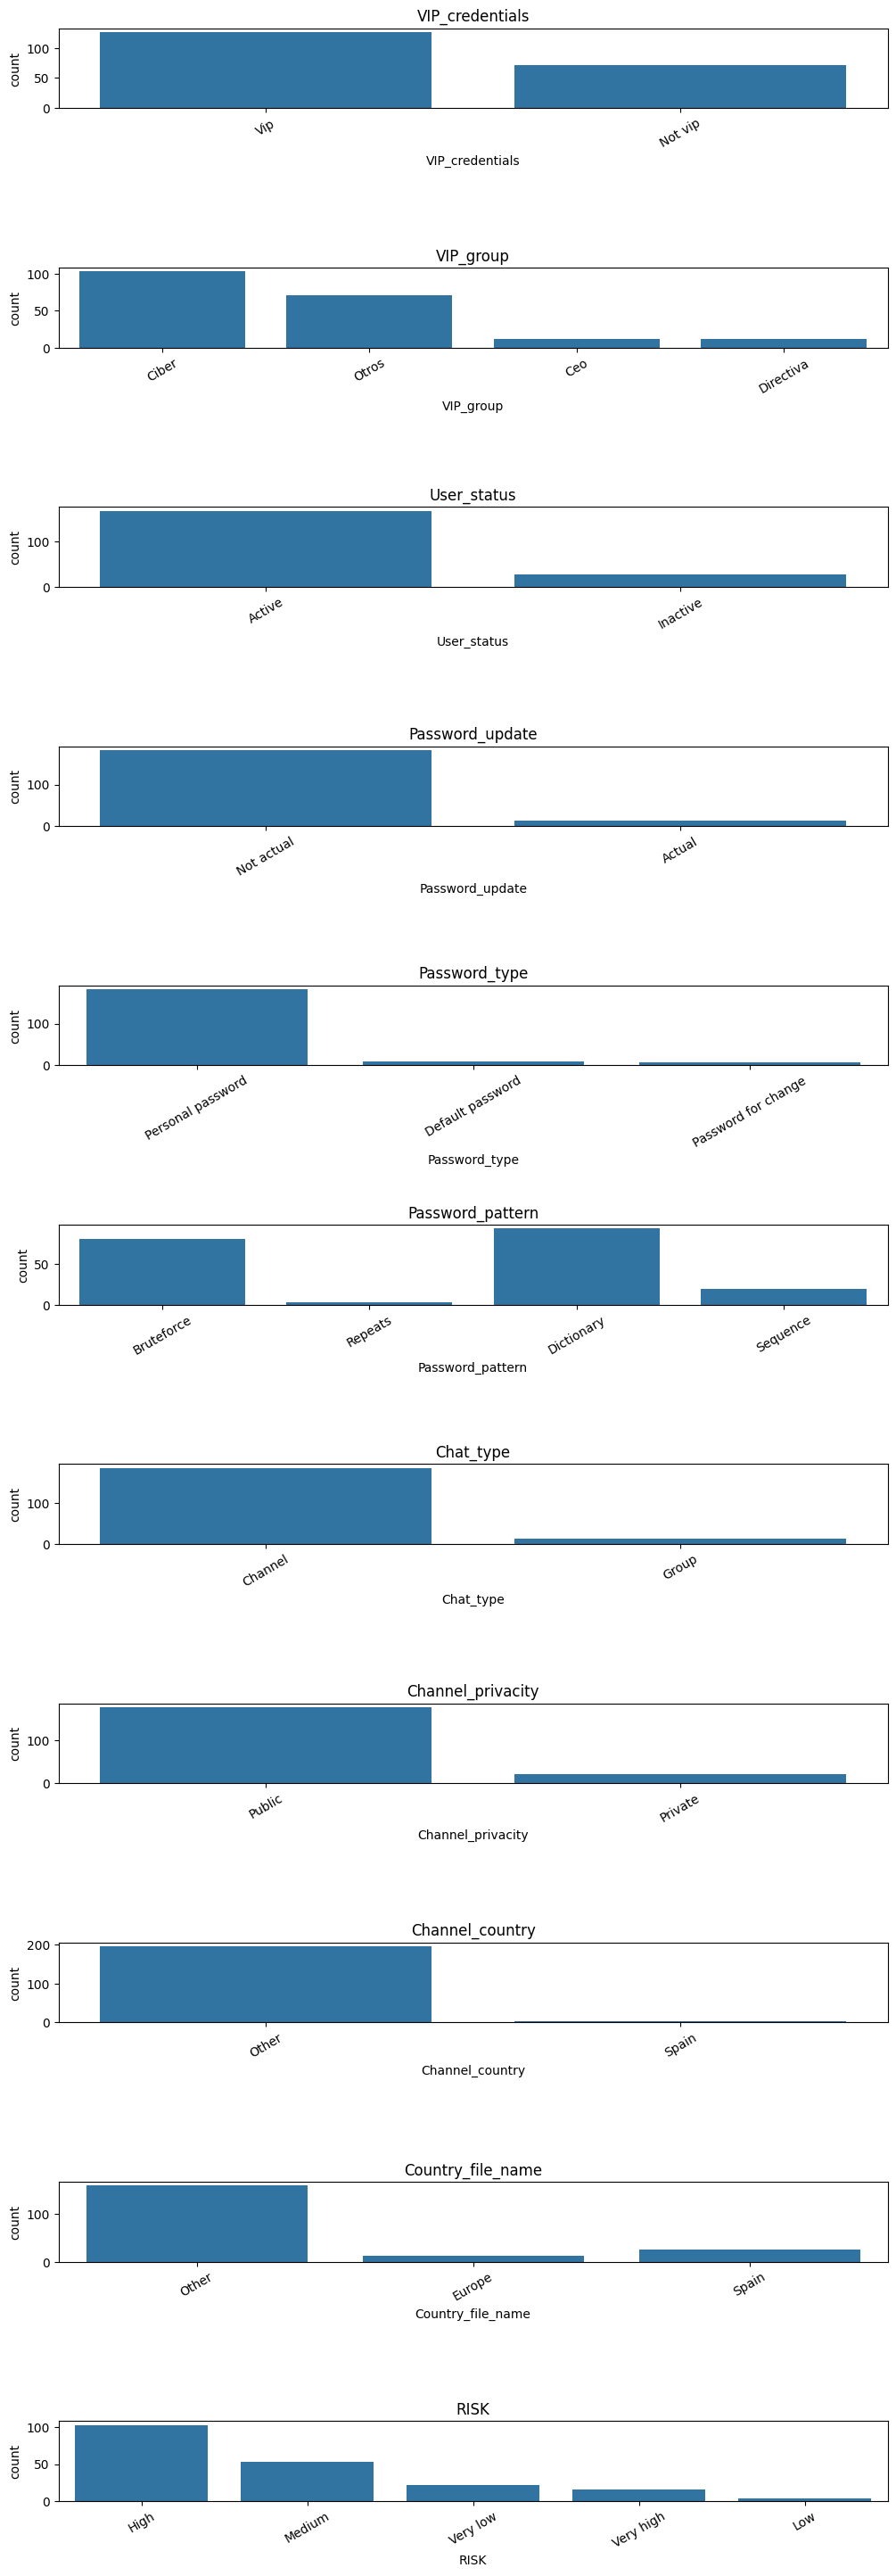

In [6]:
# Creamos una variable para almacenar todas las cabeceras de las variables independientes categóricas que queremos estudiar
cols_categories = ['VIP_credentials', 'VIP_group', 'User_status', 'Password_update', 'Password_type', 'Password_pattern', 'Chat_type', 'Channel_privacity', 'Channel_country', 'Country_file_name', 'RISK']
fig, ax = plt.subplots(nrows=len(cols_categories), ncols=1, figsize=(12,36))
fig.subplots_adjust(hspace=2)

for i, col in enumerate(cols_categories):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col) # Titulo de los subplots (nombre de cada columna)

    for tick in ax[i].get_xticklabels():
        tick.set_rotation(30) #Escribe las etiquetas del eje x (subniveles)

##### Observaciones:
Con estos diagramas de barras podemos obtener conclusiones de qué subniveles son los que tienen más frecuencia de aparición en el conjunto de datos para cada una de las variables categóricas estudiadas.

Por ejemplo:
* La mayoría de credenciales detectadas corresponden a usuarios del grupo vip Ciber (podríamos determinar un plan de acción para que en ese departamente se conciencie de la necesidad de proteger las credenciales). Además la mayoría se corresponden con usuarios activos.
* La mayoría de canales no se corresponden a España sino a otros países (hipóteis: los ciberdelincuentes españoles no inciden mucho en este tipo de ciberdelincuencia)
* La mayoría de chats por los que se difunden credenciales exfiltradas son de tipo canal público
* La mayoría de contraseñas filtradas son personales, no se corresponden con las contraseñas establecidas por defecto o de cambio

#### VARIABLES NUMÉRICAS
* DESCRIPCIÓN ESTADÍSTCA
  
Para estudiar las variables numéricas podemos utilizar la función .describe() que proporciona datos estadísticos descriptivos básicos

Pero también las representaremos gráficamente con histogramas

In [7]:
cols_num = columnas_int + columnas_float
cols_num.remove('Muestra_ID') #quitamos Muestra ID porque es un metadato y no interesa analizarlo
df_num = df.drop(columns=['Muestra_ID'])
                          
df_num.describe()


,Leaked_password,Guesses_discover,Cracking_time,Password_strength,Password_entropy,Subscribers,Engagement_rate,Mentions,Posts_day,Reposts,Results_file,TOTAL
count,1.970000e+02,197.000000,1.970000e+02,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,3.091060e+05,6.730761,5.219890e+11,1.883249,46.557970,4435.710660,14.716091,63.284264,12.005076,4.654822,4.446701,61.349378
std,3.047353e+06,3.635521,7.123754e+12,1.407550,19.888961,2656.687698,8.544014,97.889309,20.510450,4.595099,2.176744,21.457053
min,0.000000e+00,0.300000,2.000000e-01,0.000000,3.000000,200.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.907036
25%,0.000000e+00,3.490000,1.939000e+02,1.000000,29.900000,2380.000000,8.090000,3.000000,2.000000,1.000000,3.000000,52.125172
50%,3.300000e+01,6.290000,1.440000e+05,2.000000,45.600000,3635.000000,16.300000,21.000000,4.000000,3.000000,4.000000,71.751288
75%,1.296400e+04,10.000000,1.000000e+09,3.000000,61.000000,6000.000000,20.830000,71.000000,12.000000,8.000000,6.000000,75.842165
max,4.254281e+07,15.000000,1.000000e+14,4.000000,95.270000,9509.000000,35.440000,370.000000,86.000000,15.000000,9.000000,88.524819


In [8]:
# Podemos sacar esta información de cada variable por separado
df['Password_entropy'].describe()

count    197.000000
mean      46.557970
std       19.888961
min        3.000000
25%       29.900000
50%       45.600000
75%       61.000000
max       95.270000
Name: Password_entropy, dtype: float64

* REPRESENTACIÓN GRÁFICA

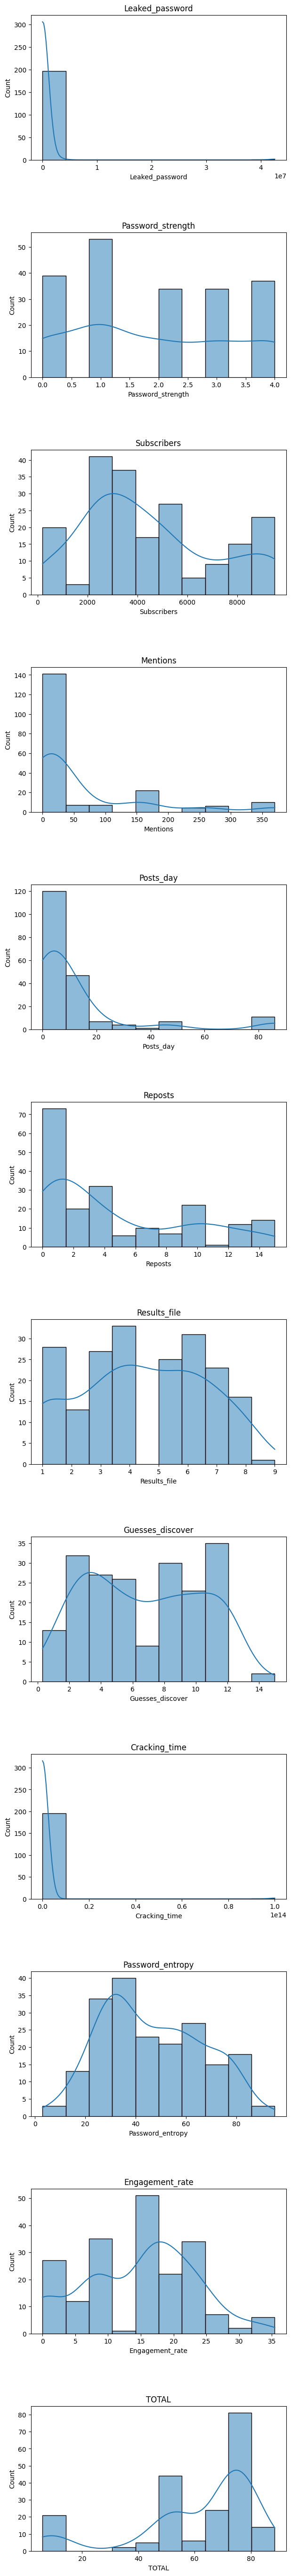

In [9]:
fig, ax = plt.subplots(nrows=12, ncols=1, figsize=(7,70))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.histplot(x=col, data=df, ax=ax[i], bins=10, kde=True)
    ax[i].set_title(col)


##### Leaked Password y Cracking time
Observaciones: 

Las contraseñas leakeadas se concentran en valores pequeños, aunque hay valores exageradamente grandes que hacen que el conjunto de datos tenga una desviación muy elevada.

Con el violinplot podemos apreciar tanto la densidad de los valores centrales como la presencia de los outliers extremos.

Se realiza otra representación gráfica eliminando el outlier principal para apreciar con más detalle la distribución de los datos que se concentran en valores más bajos.

Con los datos estadísticos descriptivos básicos vemos que el 25% de las contraseñas no han sido leakeadas nunca, y que el 50% de las contraseñas han sido leakeadas menos de 33 veces.

Aplicamos el mismo ajuste y la visualización de violinplot también a Cracking time ya que ocurre lo mismo

In [10]:
describe = df['Leaked_password'].describe()
describe.apply(lambda x: '{:.1f}'.format(x))

count         197.0
mean       309106.0
std       3047353.2
min             0.0
25%             0.0
50%            33.0
75%         12964.0
max      42542807.0
Name: Leaked_password, dtype: object

<Axes: xlabel='Leaked_password'>

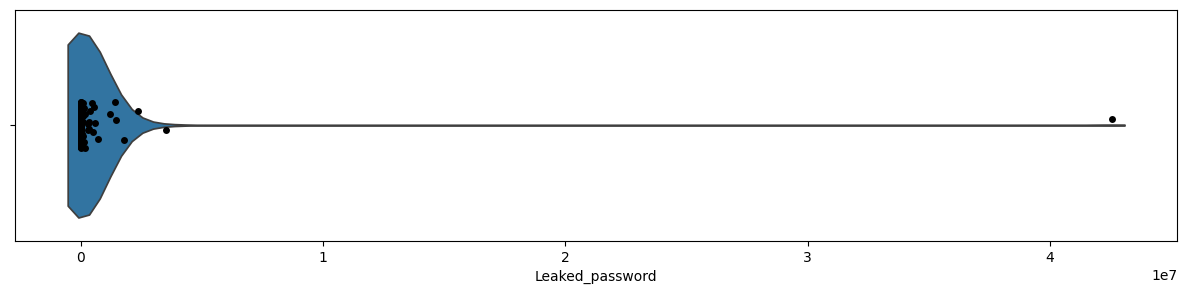

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,3))
sns.violinplot(x="Leaked_password", data=df, cut = 0.5, ax=ax)
sns.stripplot(x="Leaked_password", data=df, ax=ax, size=5, color="black")

Para ajustar la notación científica:
``` python
        ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        x.ticklabel_format(style='plain', axis='x')
```

In [12]:
describe = df['Cracking_time'].describe()
describe.apply(lambda x: '{:.1f}'.format(x))

count                197.0
mean        521988984748.3
std        7123753658551.6
min                    0.2
25%                  193.9
50%               144000.0
75%           1000000000.0
max      100000000001000.0
Name: Cracking_time, dtype: object

<Axes: xlabel='Cracking_time'>

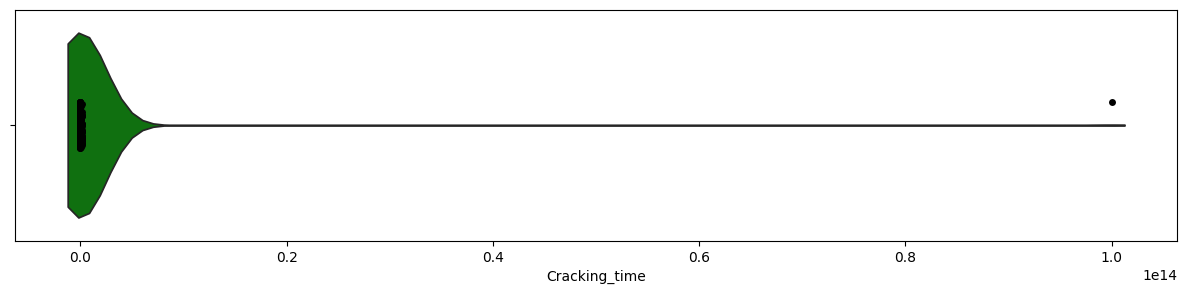

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,3))
sns.violinplot(x="Cracking_time", data=df, cut = 0.5, ax=ax, color='green')
sns.stripplot(x="Cracking_time", data=df, ax=ax, size=5, color="black")

<Axes: xlabel='Cracking_time'>

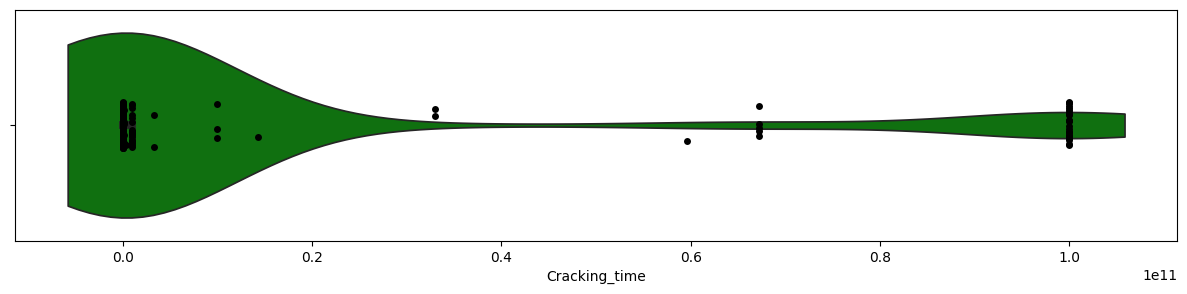

In [14]:
df3 = df.copy()
# print(f'Tamaño dataframe antes de eliminar: {df2.shape}')
df3.drop([119], inplace=True)
# print(f'Tamaño dataframe después de eliminar: {df2.shape}')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,3))
sns.violinplot(x="Cracking_time", data=df3, cut = 0.5, ax=ax, color ='green')
sns.stripplot(x="Cracking_time", data=df3, ax=ax, size=5, color="black")

NameError: name 'df2' is not defined

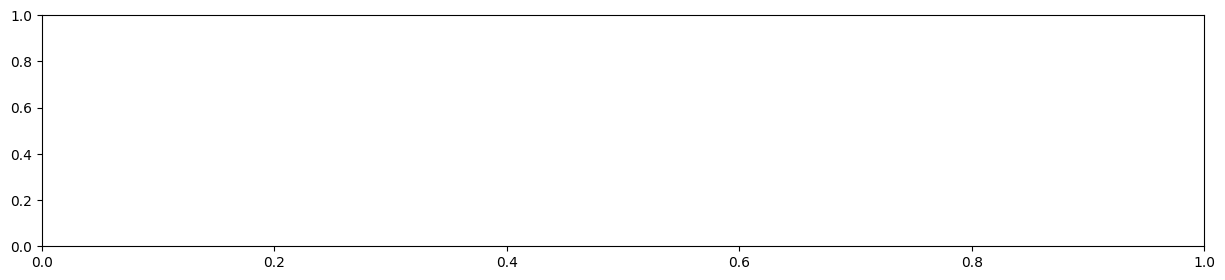

In [15]:
# df2 = df.copy()
# print(f'Tamaño dataframe antes de eliminar: {df2.shape}')
# df2.drop([159], inplace=True)
# print(f'Tamaño dataframe después de eliminar: {df2.shape}')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,3))
sns.violinplot(x="Leaked_password", data=df2, cut = 0.5, ax=ax)
sns.stripplot(x="Leaked_password", data=df2, ax=ax, size=5, color="black")

<Axes: xlabel='Leaked_password'>

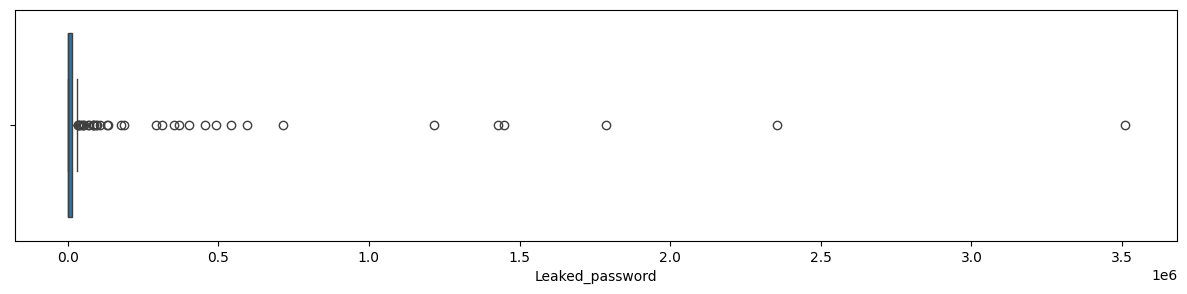

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,3))
sns.boxplot(x=df2['Leaked_password'])

## Gráficas hechas con Dash

### Representación del Análisis de Distribución de los Canales por Características y Categorías

In [16]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd
import dash_bootstrap_components as dbc
from base64 import b64encode
import io

In [17]:
app = Dash(__name__)

#Selección de columnas del dataframe
df = df[["CHANNEL_NAME", 'VIP_credentials', 'VIP_group', 'User_status', 'Password_update', 'Password_type', 'Password_pattern', 'Chat_type', 'Channel_privacity', 'Channel_country', 'Country_file_name', 'RISK']]

#Componentes de la check list
radio_items = dcc.RadioItems(
    id='radio-items',
    options=[{'label': 'VIP Credentials ', 'value': 'VIP_credentials'},
             {'label': 'VIP Group', 'value': 'VIP_group'},
             {'label': 'User Status', 'value': 'User_status'},
             {'label': 'Password Update', 'value': 'Password_update'},
             {'label': 'Password Type', 'value': 'Password_type'},
             {'label': 'Password Pattern', 'value': 'Password_pattern'},
             {'label': 'Chat Type', 'value': 'Chat_type'},
             {'label': 'Channel Privacity', 'value': 'Channel_privacity'},
             {'label': 'Channel Country', 'value': 'Channel_country'},
             {'label': 'Country in File Name', 'value': 'Country_file_name'},
             {'label': 'RISK Category', 'value': 'RISK'},
             {'label': 'Recuento Total', 'value': 'total_count'}],

    value='VIP_group',
)


dropdown_option = dcc.Dropdown(
    id="dropdown", 
    options=[{"label": group, "value": group} for group in df["VIP_group"].unique()],
    value=df["VIP_group"].unique()[0]
)

download_button = html.A(
    html.Button("Download as HTML"),
    id="href",
    href="href",
    download="plotly_graph.html",
)

app.layout = dbc.Container(
    [
        html.H2(f"Channels by selected feature"),
        html.Hr(),
        dbc.Row(
            [
                dbc.Col([radio_items, dropdown_option, download_button], md=6, sm=12),
                dbc.Col(dcc.Graph(id="graph")),
            ]
        ),
    ]
)

@app.callback(
    Output("dropdown", "options"),
    Output("dropdown", "value"),
    Input("radio-items", "value")
)

def update_dropdown_options(feature):
    if feature == 'total_count':
        return [], None
    options = [{"label": group, "value": group} for group in df[feature].unique()]
    value = df[feature].unique()[0]
    return options, value

@app.callback(
    Output("graph", "figure"),
    Output("href", "href"),
    Input("radio-items", "value"),
    Input("dropdown", "value")
)

def update_bar_chart(feature, group):
    if feature == 'total_count':
        channel_counts = df["CHANNEL_NAME"].value_counts().reset_index()
        channel_counts.columns = ["CHANNEL_NAME", "Frequency"]
        channel_counts = channel_counts.sort_values(by='Frequency', ascending=True)

    else:
        # Dataframe filtrad = dff
        dff = df[df[feature] == group]

        #Contar la frecuencia de aparición de cada canal
        channel_counts = dff["CHANNEL_NAME"].value_counts().reset_index()
        channel_counts.columns = ["CHANNEL_NAME", "Frequency"]
        channel_counts = channel_counts.sort_values(by='Frequency', ascending=True)

        # Seleccionar los 10 canales más frecuentes
        #top_channels = channel_counts.head(10)
    
    # Crear el gráfico de barras
    fig = px.bar(channel_counts, x="Frequency", y="CHANNEL_NAME", text="Frequency", color="Frequency")

    buffer = io.StringIO()
    fig.write_html(buffer)
    html_bytes = buffer.getvalue().encode()
    encoded = b64encode(html_bytes).decode()
    href = "data:text/html;base64," + encoded

    return fig, href


if __name__ == "__main__":
    app.run_server(port=8056, debug=True)